# This logistic regression model predicts a classification- survival or deceased. 
# The data set used is a semi cleaned version of the titanic data set. 


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [63]:
train=pd.read_csv('titanic_train.csv')

In [64]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


EDA

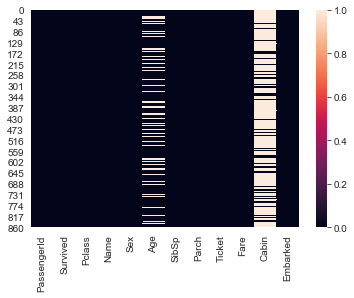

In [65]:
sns.heatmap(train.isnull(), linecolor='black')

In [66]:
sns.set_style('whitegrid')

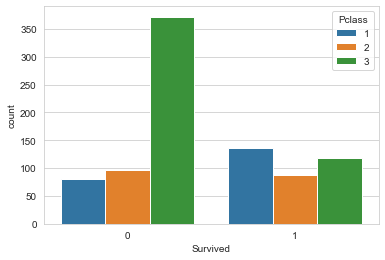

In [67]:
sns.countplot(x='Survived', hue='Pclass', data= train)

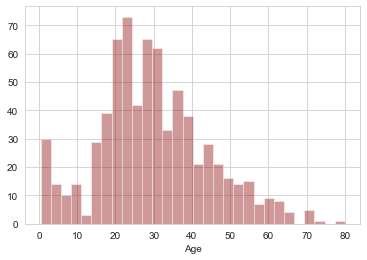

In [68]:
sns.distplot(train['Age'].dropna(),kde=False,color='darkred',bins=30)

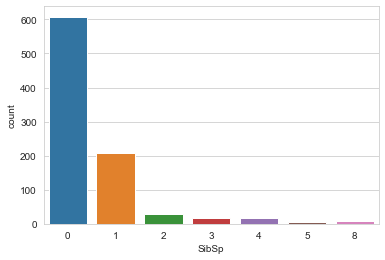

In [69]:
sns.countplot(x='SibSp',data=train)

Data Cleaning

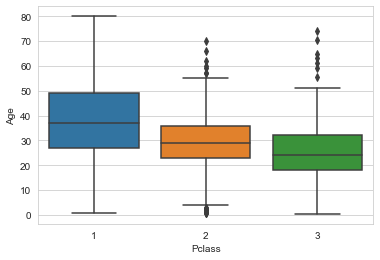

In [70]:
sns.boxplot(x='Pclass',y='Age', data= train)

In [71]:
def impute_age(s):
    Age = s[0]
    Pclass = s[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [72]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

In [75]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [74]:
train.drop('Cabin',axis=1,inplace=True)

In [89]:
Sex=pd.get_dummies(train['Sex'], drop_first=True)

In [84]:
Sex

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [94]:
embark = pd.get_dummies(train['Embarked'],drop_first=True)

In [95]:
embark

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
886,0,1
887,0,1
888,0,1
889,0,0


In [142]:
train=pd.concat([train,sex,embark],axis=1)

In [138]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,female,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0,1,0,1


In [143]:
train=train.drop(['Sex','Embarked','Name','Ticket','PassengerId','female'], axis =1)

# Regression Model

In [144]:
X=train.drop('Survived', axis=1)

In [148]:
y=train['Survived']

In [176]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [177]:
from sklearn.model_selection import train_test_split

In [178]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.30, random_state=101)



In [179]:
from sklearn.linear_model import LogisticRegression 

In [180]:
logmodel= LogisticRegression()


In [181]:
X_train


,Pclass,Age,SibSp,Parch,Fare,male,Q,S,male,Q,S
520,1,30.0,0,0,93.5000,0,0,1,0,0,1
510,3,29.0,0,0,7.7500,1,1,0,1,1,0
446,2,13.0,0,1,19.5000,0,0,1,0,0,1
2,3,26.0,0,0,7.9250,0,0,1,0,0,1
691,3,4.0,0,1,13.4167,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
575,3,19.0,0,0,14.5000,1,0,1,1,0,1
838,3,32.0,0,0,56.4958,1,0,1,1,0,1
337,1,41.0,0,0,134.5000,0,0,0,0,0,0
523,1,44.0,0,1,57.9792,0,0,0,0,0,0


In [184]:
logmodel.fit(X_train, y_train)

C:\Users\91981\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [185]:
predictions=logmodel.predict(X_test)

In [186]:
from sklearn.metrics import classification_report

In [190]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.77      0.86      0.81       154
           1       0.78      0.65      0.71       114

    accuracy                           0.77       268
   macro avg       0.77      0.76      0.76       268
weighted avg       0.77      0.77      0.77       268



In [188]:
from sklearn.metrics import confusion_matrix

In [189]:
confusion_matrix(y_test, predictions)

array([[133,  21],
       [ 40,  74]], dtype=int64)